BRUH...
Fix Velocity Dispersion (And uncertainty first)

Things needed:
Cluster Data
Bins

split bins 
Find mean of the color
find velocity dispersion
find error bars

Plot velocity dispersion with error bars

[a2029sohn17mem]

# K Corrections
### E westra et al 2010 AJ? -Empircal k-correction
-> i want to observe this galaxy,
    observing through my restframe r-spectrum (is streched ->is bluer in galaxy frame)
    
    if z=.2 -> looking as the galaxy was in past, not today (evolutionary correction)
    

In [78]:
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import math
import os
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=100, Ode0=.7,Om0=0.3)

#this 'magic' matplotlib command tells iPython to show any figures in this notebook, 
#rather than a separate window or saving them in separate files.
%matplotlib inline

#These commands help python remember how to format my figures so that they look nice
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [79]:
coeff10r = -0.196478  # Westra et al 2010 Table A21 K_r(z)
coeff20r = -5.4512 
coeff30r = 7.81183 
coeff11r = 3.11481 
coeff21r = -6.547 
coeff31r = 8.41136 
coeff12r = 0.486552 
coeff22r = 1.09495 
coeff32r = -3.05571 
coeff13r = -1.12639 
coeff23r = 2.90943 
coeff33r = -2.2226 

coeff10g = 0.184129  # Westra et al 2010 Table A20 K_g(z)
coeff20g = 0.112299 
coeff30g = -2.37339 
coeff11g = 1.00938 
coeff21g = -6.17196 
coeff31g = 15.3331 
coeff12g = 5.40158 
coeff22g = -7.21778 
coeff32g = -1.95179 
coeff13g = -2.41043 
coeff23g = 4.89703 
coeff33g = -2.36049 

c=3*10**5

labels=['Mr','\u03C3','\u0394\u03C3\u208A','\u0394\u03C3\u208B']

def dispersion(vel,err,mag):
    
    data=[]
    
    ##This will calculate each dispersion of the array
    for i in range(len(vel)):

        c=3*10**5
        df=(len(vel[i])-1)
        vbar= np.average(vel[i])
        eczbar=np.average(err[i])

        vel1= (vel[i]- vbar)/(1+vbar/c)
        velDis= sum(vel1**2/df) - (eczbar**2/(1+vbar/c)**2 )
        
        interval= stats.chi2.interval(.68,df)
        deltastar2= (eczbar)**2 /((1+vbar/c)**2)

        temp=[np.average(mag[i])]
        temp.append(np.sqrt(velDis))
        temp.append(np.sqrt((np.sqrt(df/interval[1])-1)**2 *velDis + deltastar2*(1+deltastar2/(2*velDis))/(df+1)))
        temp.append(np.sqrt((np.sqrt(df/interval[0])-1)**2 *velDis + deltastar2*(1+deltastar2/(2*velDis))/(df+1)))
        data.append(temp)
         
    return data


##This is a function taken from stack exchange that splits a list into n-equal parts
def chunkIt(seq, num):
    
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out


def cluster(i):

    if i==1:
        cz, ecz, g,r, mem, dist = np.loadtxt(os.getcwd()+"\Data\comaallzad.tab.010.q25mem.tab", usecols=(2,3,5,6,9,10), skiprows=2, unpack=True)
        name='Coma'
    elif i==2:
        cz, ecz, g,r, mem, dist = np.loadtxt(os.getcwd()+"\Data\\a2069newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)
        name='a2069'
    elif i==3:
        cz, ecz, g,r, mem, dist = np.loadtxt(os.getcwd()+"\Data\\a2219newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)
        name='a2219'
    elif i==4:
        cz, ecz, g,r, mem, dist = np.loadtxt(os.getcwd()+"\Data\\rxj1720newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)    
        name='rxj1720'
    elif i==5:
        mem=True
        dist=True
        cz, ecz, g,r = np.loadtxt(os.getcwd()+"\Data\\a2029sohn17memphot.tab", usecols=(2,3,13,14),skiprows=2, unpack=True)    
        name='a2029'

    return cz, ecz, g, r, mem, dist,name
'''

def cluster(i):

    if i==1:
        cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+"\Data\comaallzad.tab.010.q25mem.tab", usecols=(2,3,6,9,10), skiprows=2, unpack=True)
        name='Coma'
    elif i==2:
        cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+"\Data\\a2069newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
        name='a2069'
    elif i==3:
        cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+"\Data\\a2219newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)
        name='a2219'
    elif i==4:
        cz, ecz, r, mem, dist = np.loadtxt(os.getcwd()+"\Data\\rxj1720newad.mem.dat", usecols=(2,3,6,10,11), unpack=True)    
        name='rxj1720'
    elif i==5:
        mem=True
        dist=True
        cz, ecz, r = np.loadtxt(os.getcwd()+"\Data\\a2029sohn17memphot.tab", usecols=(2,3,14),skiprows=2, unpack=True)    
        name='a2029'

    return cz, ecz, r, mem, dist,name
'''
##Function of sorts that will find the indexes of members of clusters (used for Red Blue split)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]


def totalDis(r,cz,ecz,dist=False,mem=False):
    ##Using an optional distance parameter to have a radial cut and then organizing
    ##Velocity and errors to be ordered by magnitude in the r filter
    if (type(dist)is bool and type(mem) is bool) :
        magIndexDcut = np.argsort(r)
        
        rt=r
        czt=cz
        eczt=ecz
        print("No distance cut:")
    elif type(dist) is list:
        rt=r[dist < 1]
        czt=czt[dist<1]
        eczt=eczt[dist<1]
        
        magIndexDcut = np.argsort(r[dist < 1])
        print('Using a distance cut:')
    else:
        rt = r[mem == 1]
        czt= cz[mem ==1]
        eczt=ecz[mem==1]
        
        magIndexDcut = np.argsort(rt)
        print('Using a membership cut')
    
    velocities = [czt[magIndexDcut]]
    errors = [eczt[magIndexDcut]]
    magnitude=[rt[magIndexDcut]]
    rrr=chunkIt(rt,1)

    normal = dispersion(velocities,errors,magnitude)
    #print("The average parameters [M,\u03C3,\u0394\u03C3\u208A,\u0394\u03C3\u208B]",normal)
    
    names = range(1,2)
    
    return np.array(normal)
    
    
def BBCD(Bins,r,cz,ecz,dist=False,mem=False):
    ##Using an optional distance parameter to have a radial cut and then organizing
    ##Velocity and errors to be ordered by magnitude in the r filter
    if (type(dist)is bool and type(mem) is bool) :
        magIndexDcut = np.argsort(r)
        
        rt=r
        czt=cz
        eczt=ecz
        print("No distance cut:")
    elif type(dist) is list:
        rt=r[dist < 1]
        czt=czt[dist<1]
        eczt=eczt[dist<1]
        
        magIndexDcut = np.argsort(r[dist < 1])
        print('Using a distance cut:')
    else:
        rt = r[mem == 1]
        czt= cz[mem ==1]
        eczt=ecz[mem==1]
        
        magIndexDcut = np.argsort(rt)
        print('Using a membership cut')
    
    
    velocities = chunkIt(czt[magIndexDcut],Bins)
    errors = chunkIt(eczt[magIndexDcut],Bins)
    magnitude=chunkIt(rt[magIndexDcut],Bins)

    values = dispersion(velocities,errors,magnitude)
    
    #print("The parmeters [M,\u03C3,\u0394\u03C3\u208A,\u0394\u03C3\u208B] for ",Bins,'Bins',values)
    
#     names = range(1,Bins+1)
#     df = pd.DataFrame(values, index=names, columns=['Mr','\u03C3','\u0394\u03C3\u208A','\u0394\u03C3\u208B'])
#     display(df)

    
#     downerrors= [np.sqrt((normal[0][2]/normal[0][1])**2+(values[i][2]/values[i][1])**2) for i in range(len(values))]
#     uperrors=[np.sqrt((normal[0][3]/normal[0][1])**2+(values[i][3]/values[i][1])**2) for i in range(len(values))]
    
    return np.array(values)

def bright10(r,cz,ecz,dist=False,mem=False,brightest=10):
    if (type(dist)is bool and type(mem) is bool) :
        magIndexDcut = np.argsort(r)
        rt = r       
        czt= cz
        eczt=ecz
        
        print("No distance cut:")
    elif type(dist) is list:
        rt=r[dist < 1]
        czt= cz[dist < 1]
        eczt=ecz[dist < 1]
        
        magIndexDcut = np.argsort(rt)
        print('Using a distance cut:')
    else:
        print('Using a membership cut:')
        rt = r[mem == 1]        
        czt= cz[mem ==1]
        eczt=ecz[mem==1]
        
        magIndexDcut = np.argsort(rt)
    
    velocities = [czt[magIndexDcut[:brightest]]]
    errors = [eczt[magIndexDcut[:brightest]]]
    magnitude=[rt[magIndexDcut[:brightest]]]
    
    
    values = dispersion(velocities,errors,magnitude)
    
    #print("The parmeters [M,\u03C3,\u0394\u03C3\u208A,\u0394\u03C3\u208B] for "+str(brightest)+ " brightest",values)
    
    #names = range(1,2)
    #df = pd.DataFrame(values, index=names, columns=['Mr','\u03C3','\u0394\u03C3\u208A','\u0394\u03C3\u208B'])
    #display(df)
    
    
    return np.array(values)

def normalizer(normal,stacks):
    
    disp=stacks[:,1]/normal[0][1]
    uperrors=[np.sqrt((v/n)**2+(normal[0][2]/normal[0][1])**2) for n, v in zip(stacks[:,1], stacks[:,2])]
    downerrors=[np.sqrt((v/n)**2+(normal[0][3]/normal[0][1])**2) for n, v in zip(stacks[:,1], stacks[:,3])]
    
    final=np.column_stack([stacks[:,0],disp,uperrors,downerrors])
    
    return final

def plotMyCluster(bins,r,cz,ecz,mem=False,dist=False,brightest=10):
    
    overall=totalDis(r,cz,ecz,mem=mem)

    values=BBCD(bins,r,cz,ecz,mem=mem)

    bright=bright10(r,cz,ecz,mem=mem,brightest=brightest)
    
    display(pd.DataFrame(np.vstack([overall,bright,values]),index=['Total','Bright '+str(brightest) ,1,2,3,4,5],columns=labels))
    
    normed=normalizer(overall,np.vstack([bright[0],values]))
    print('Normalized')
    display(pd.DataFrame(normed,index=['Bright '+str(brightest),1,2,3,4,5],columns=labels))


    plt.scatter(normed[:,0],normed[:,1],c='k',s=25,label='Binned Clusters')
    plt.scatter(normed[:,0][0],normed[:,1][0],c='r',s=25,label='Brightest '+str(brightest))
    
    plt.xlabel('Average r-Magnitude')
    plt.ylabel('Velocity Dispersion (km/s)')

    for i in range(len(normed[:,0])):
        plt.errorbar(normed[:,0][i],normed[:,1][i],yerr=[[normed[:,2][i]],[normed[:,3][i]]],capsize=5,linewidth=1.5,color='k')
    plt.legend()
    

def restframe(cz,g,r):

    z0 = cz/c     
    
    coeffr0 = coeff10r*z0 + coeff20r*z0**2 + coeff30r*z0**3 
    coeffr1 = coeff11r*z0 + coeff21r*z0**2 + coeff31r*z0**3 
    coeffr2 = coeff12r*z0 + coeff22r*z0**2 + coeff32r*z0**3 
    coeffr3 = coeff13r*z0 + coeff23r*z0**2 + coeff33r*z0**3 

    coeffg0 = coeff10g*z0 + coeff20g*z0**2 + coeff30g*z0**3 
    coeffg1 = coeff11g*z0 + coeff21g*z0**2 + coeff31g*z0**3 
    coeffg2 = coeff12g*z0 + coeff22g*z0**2 + coeff32g*z0**3 
    coeffg3 = coeff13g*z0 + coeff23g*z0**2 + coeff33g*z0**3 
    for i in range(len(z0)):
        if z0[i]<=0:
            z0[i]=np.exp(999)
    miappstarz0 = [22.44 + 3.36*math.log(i) + 0.273*(math.log(i))**2 - 0.0618*(math.log(i))**3 - 0.0227*(math.log(i))**4 for i in z0]
    riz0 = 0.7*z0 + 0.34
    mrappstarz0 = miappstarz0 + riz0 
    mrapptestz0 = mrappstarz0 + 1.5 
    gr = g-r
    kcorrectr = coeffr0 + coeffr1*gr + coeffr2*gr**2 + coeffr3*gr**3 
    kcorrectg = coeffg0 + coeffg1*gr + coeffg2*gr**2 + coeffg3*gr**3 
    
    
    rabs=np.array([i - 25 - 5*math.log(j)/math.log(10) - k for i,j,k in zip(r,cosmo.luminosity_distance(z0).value,kcorrectr)])
     
    grcorr = gr - kcorrectg + kcorrectr 
    tgr0 = -0.0236265*(rabs) + 0.296184 
    
    return rabs,grcorr


In [80]:
'''
I need to normalize the the velocity dispersion. does that mean the new errors are the old erros divided by the overall 
dispersion. what happens with the error associated error?
'''

'\nI need to normalize the the velocity dispersion. does that mean the new errors are the old erros divided by the overall \ndispersion. what happens with the error associated error?\n'

In [81]:

cz, ecz, g,r, mem, dist,name=cluster(1)
totalDis(r,cz,ecz,mem=mem)

Using a membership cut


array([[  16.02647619,  672.86456811,   13.38764536,   14.24185547]])

No distance cut:
No distance cut:
No distance cut:


,Mr,σ,Δσ₊,Δσ₋
Total,16.902858,782.413006,27.278812,30.480162
Bright 5,14.519600,315.819551,69.541751,213.486433
1,15.862658,776.876404,57.098973,73.352602
2,16.561616,842.931382,61.947437,79.584484
3,16.986644,748.552940,55.020502,70.680834
4,17.336329,813.182625,59.769148,76.781983
5,17.755365,736.817846,53.831450,69.032271


Normalized


,Mr,σ,Δσ₊,Δσ₋
Bright 5,14.519600,0.403648,0.222938,0.677098
1,15.862658,0.992924,0.081348,0.102141
2,16.561616,1.077348,0.081341,0.102135
3,16.986644,0.956724,0.081352,0.102144
4,17.336329,1.039327,0.081350,0.102142
5,17.755365,0.941725,0.080952,0.101466


Text(0.5,1,'a2029')

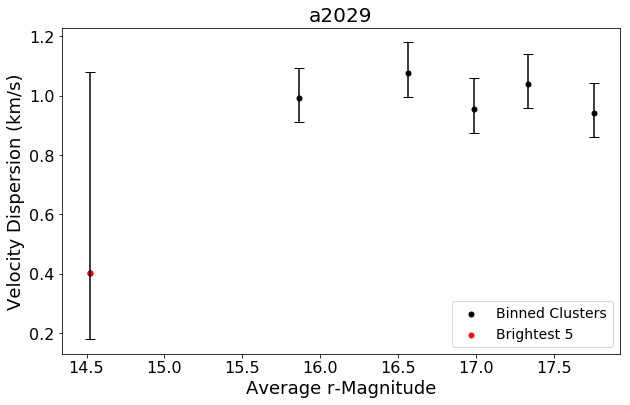

In [82]:
cz, ecz, g,r, mem, dist,name=cluster(5)

plotMyCluster(5,r,cz,ecz,brightest=5)
plt.title(name)

Using a membership cut
Using a membership cut
Using a membership cut:


,Mr,σ,Δσ₊,Δσ₋
Total,16.026476,672.864568,13.387645,14.241855
Bright 10,12.507100,717.719525,121.869901,251.595439
1,14.044787,703.570839,30.220697,34.717788
2,15.308170,680.465419,29.228436,33.577816
3,16.228268,644.178391,27.670671,31.787997
4,16.938064,693.651452,29.797618,34.230918
5,17.606369,631.591291,27.082166,31.101014


Normalized


,Mr,σ,Δσ₊,Δσ₋
Bright 10,12.507100,1.066663,0.170963,0.351187
1,14.044787,1.045635,0.047338,0.053693
2,15.308170,1.011296,0.047338,0.053693
3,16.228268,0.957367,0.047339,0.053694
4,16.938064,1.030893,0.047342,0.053696
5,17.606369,0.938660,0.047271,0.053599


Using a membership cut
Using a membership cut
Using a membership cut:


,Mr,σ,Δσ₊,Δσ₋
Total,17.689421,902.402041,37.431257,42.757407
Bright 10,15.820100,647.516336,110.841665,227.419419
1,16.542200,816.678764,71.230172,96.403529
2,17.264020,1045.743100,90.238134,121.864044
3,17.709059,935.639668,80.720170,109.020696
4,18.181922,731.451952,63.125788,85.244632
5,18.727412,961.934098,82.977969,112.076606


Normalized


,Mr,σ,Δσ₊,Δσ₋
Bright 10,15.820100,0.717548,0.176134,0.354400
1,16.542200,0.905005,0.096580,0.127198
2,17.264020,1.158844,0.095743,0.125798
3,17.709059,1.036832,0.095726,0.125785
4,18.181922,0.810561,0.095753,0.125805
5,18.727412,1.065971,0.095716,0.125778


Using a membership cut
Using a membership cut
Using a membership cut:


,Mr,σ,Δσ₊,Δσ₋
Total,19.075210,964.987868,34.779738,38.985158
Bright 10,17.256400,1115.091204,189.786058,391.107655
1,17.931250,747.493115,56.825462,73.618692
2,18.693522,1065.954608,80.429795,104.039242
3,19.116824,933.439376,71.034951,91.988886
4,19.559913,961.490084,72.655619,93.926832
5,20.058565,1076.662875,81.645750,105.400106


Normalized


,Mr,σ,Δσ₊,Δσ₋
Bright 10,17.256400,1.155549,0.173972,0.353060
1,17.931250,0.774614,0.084132,0.106451
2,18.693522,1.104630,0.083619,0.105633
3,19.116824,0.967307,0.084204,0.106508
4,19.559913,0.996375,0.083721,0.105713
5,20.058565,1.115727,0.083961,0.105904


Using a membership cut
Using a membership cut
Using a membership cut:


,Mr,σ,Δσ₊,Δσ₋
Total,19.529418,809.729573,28.000456,31.211808
Bright 10,16.683600,662.556423,112.782973,232.393788
1,17.759880,692.038052,50.384146,64.438286
2,18.872840,737.548698,53.699833,68.677725
3,19.598120,772.299066,56.280744,71.953266
4,20.238547,906.850191,66.066606,84.473857
5,21.156013,910.307997,66.797356,84.838688


Normalized


,Mr,σ,Δσ₊,Δσ₋
Bright 10,16.683600,0.818244,0.173701,0.352865
1,17.759880,0.854653,0.080600,0.100777
2,18.872840,0.910858,0.080603,0.100779
3,19.598120,0.953774,0.080662,0.100827
4,20.238547,1.119942,0.080643,0.100811
5,21.156013,1.124212,0.081119,0.100854


No distance cut:
No distance cut:
No distance cut:


,Mr,σ,Δσ₊,Δσ₋
Total,16.902858,782.413006,27.278812,30.480162
Bright 5,14.519600,315.819551,69.541751,213.486433
1,15.862658,776.876404,57.098973,73.352602
2,16.561616,842.931382,61.947437,79.584484
3,16.986644,748.552940,55.020502,70.680834
4,17.336329,813.182625,59.769148,76.781983
5,17.755365,736.817846,53.831450,69.032271


Normalized


,Mr,σ,Δσ₊,Δσ₋
Bright 5,14.519600,0.403648,0.222938,0.677098
1,15.862658,0.992924,0.081348,0.102141
2,16.561616,1.077348,0.081341,0.102135
3,16.986644,0.956724,0.081352,0.102144
4,17.336329,1.039327,0.081350,0.102142
5,17.755365,0.941725,0.080952,0.101466


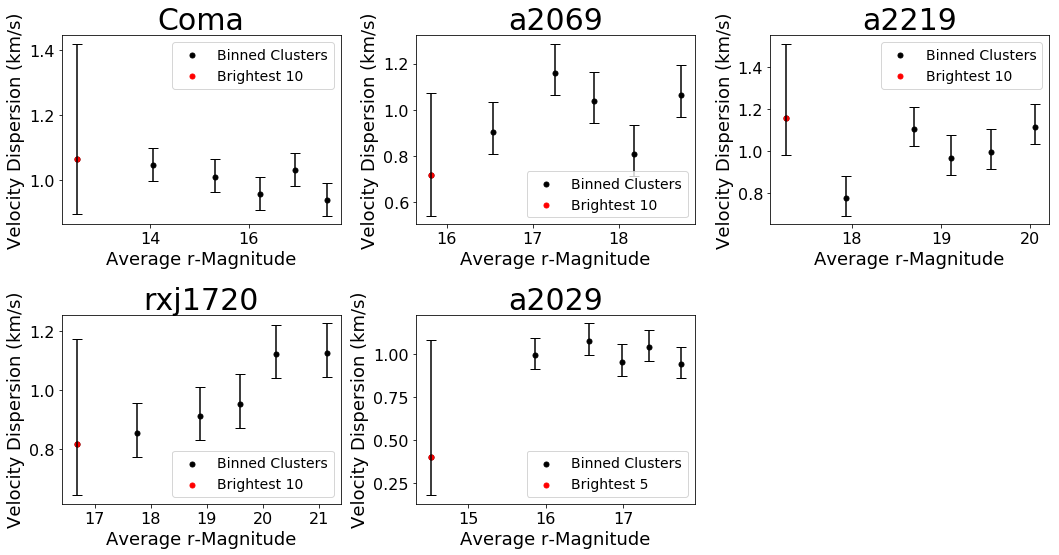

In [83]:

plt.figure(0,figsize=(15,8))
for i in range(1,5):
    plt.subplot(2,3,i)
    cz, ecz, g,r, mem, dist,name=cluster(i)
    
    plotMyCluster(5,r,cz,ecz,mem=mem,brightest=10)
    plt.title(name,fontsize=30)
    print('=======================================')
plt.subplot(2,3,5)
cz, ecz,g, r, mem, dist,name=cluster(5)
plotMyCluster(5,r,cz,ecz,brightest=5)
plt.title(name,fontsize=30)

plt.tight_layout()



#plt.hist(r,cumulative=True)
#normalized(5,r,cz,ecz,dist)
#print(float(a['Dispersion (km/s)']))
#plt.title('Coma')

In [94]:
cz, ecz,g, r, mem, dist,name=cluster(1)
disp=totalDis(r,cz,ecz,mem=mem)[0]
vbar=np.average(cz)
vel1= (cz- vbar)/(1+vbar/c)
rabs,g_r=restframe(cz,g,r)
finalList=np.column_stack([dist,vel1,np.repeat(disp[1],len(vel1)),np.repeat(disp[2],len(vel1)),np.repeat(disp[3],len(vel1)),rabs,g_r])
for i in range(2,5):
    cz, ecz, g,r, mem, dist,name=cluster(i)
    disp=totalDis(r,cz,ecz,mem=mem)[0]
    vbar=np.average(cz)
    vel1= (cz- vbar)/(1+vbar/c)
    rabs,g_r=restframe(cz,g,r)
    
    #new=np.column_stack([dist,vel1,np.repeat(disp[1],len(vel1)),rabs,g_r])
    new=np.column_stack([dist,vel1,np.repeat(disp[1],len(vel1)),np.repeat(disp[2],len(vel1)),np.repeat(disp[3],len(vel1)),rabs,g_r])
    
    finalList=np.row_stack([finalList,new])
    
'Final 2029Sohn is messed up no distance measure, so i use ? to denote i do not know'
cz, ecz, g,r, mem, dist,name=cluster(5)
disp=totalDis(r,cz,ecz,mem=mem)[0]
vbar=np.average(cz)
vel1= (cz- vbar)/(1+vbar/c)
rabs,g_r=restframe(cz,g,r)
new=np.column_stack([np.repeat('?',len(vel1)),vel1,np.repeat(disp[1],len(vel1)),np.repeat(disp[2],len(vel1)),np.repeat(disp[3],len(vel1)),rabs,g_r])
finalList=np.row_stack([finalList,new])

display(pd.DataFrame(finalList,columns=['Dist','\u0394v','\u03C3 Cluster','\u0394\u03C3\u208B','\u0394\u03C3\u208A','Mr','g-r']))

Using a membership cut
Using a membership cut
Using a membership cut
Using a membership cut
No distance cut:


C:\Users\Erick\Anaconda3\lib\site-packages\ipykernel_launcher.py:293: RuntimeWarning: overflow encountered in exp


,Dist,Δv,σ Cluster,Δσ₋,Δσ₊,Mr,g-r
0,0.024,600.2062667396875,672.8645681055029,13.38764535540394,14.241855468907426,-20.690568108207213,0.8780631624353231
1,0.024,-172.7132057371389,672.8645681055029,13.38764535540394,14.241855468907426,-17.11826065124289,0.6384022119655298
2,0.024,-631.9700351481483,672.8645681055029,13.38764535540394,14.241855468907426,-19.96327113541563,0.753612254313841
3,0.029,-889.9355733705025,672.8645681055029,13.38764535540394,14.241855468907426,-16.843333208207135,0.6812251535982543
4,0.029,-789.289927776175,672.8645681055029,13.38764535540394,14.241855468907426,-16.51683321150681,0.11978389054228696
5,0.03,-558.684370880434,672.8645681055029,13.38764535540394,14.241855468907426,-22.432050988175423,0.880746792474372
6,0.039,-673.0100071380683,672.8645681055029,13.38764535540394,14.241855468907426,-16.532776191975028,0.10532114457864272
7,0.041,672.5147888171656,672.8645681055029,13.38764535540394,14.241855468907426,-19.260014036581534,0.7529386183085622
8,0.042,244.52650949371431,672.8645681055029,13.38764535540394,14.241855468907426,-18.544851056286287,0.7676687842377955
9,0.047,914.8460519957408,672.8645681055029,13.38764535540394,14.241855468907426,-16.843531467522876,0.6658895774254159


['-20.690568108207213' '-17.11826065124289' '-19.96327113541563' ...,
 '-19.877216343171877' '-19.746498214662658' '-28.053941518795806'] ['0.8780631624353231' '0.6384022119655298' '0.753612254313841' ...,
 '0.8102123470715027' '0.5622758999811096' '-38.266608033530275']


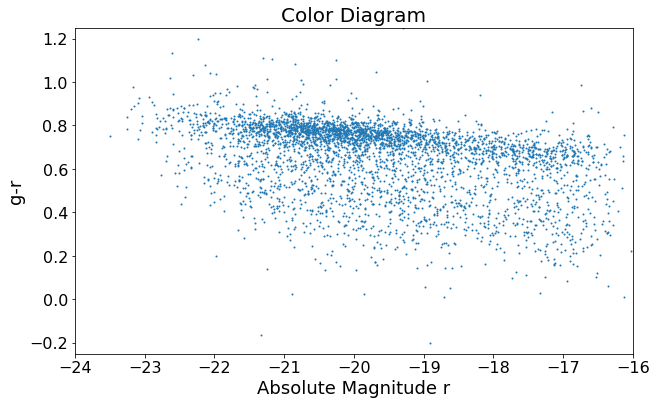

In [111]:
plt.scatter(finalList[:,-2].astype(float),finalList[:,-1].astype(float),s=1)
plt.ylim(-.25,1.25)
plt.xlim(-24,-16)
plt.title('Color Diagram')
plt.xlabel('Absolute Magnitude r')
plt.ylabel('g-r')
print(finalList[:,-2],finalList[:,-1])

254


(15.4, 19.2)

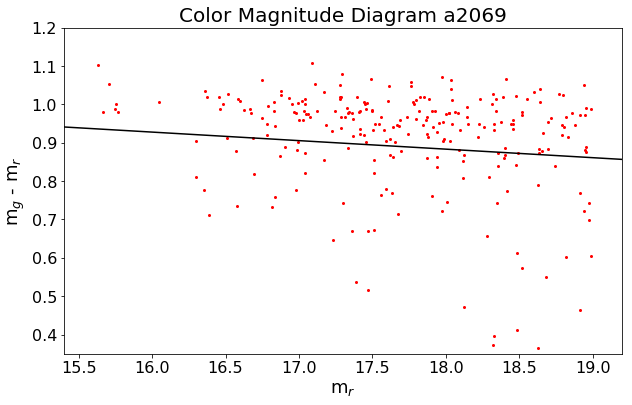

In [86]:
cz1, ecz1, g1, r1, mem1, dist1 =  np.loadtxt(os.getcwd()+r"\Data\a2069newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)

memcut1 = get_indexes(1,mem1)
print(len(memcut1))
plt.scatter(r1[memcut1],g1[memcut1]-r1[memcut1],s=4,c='r')
plt.plot([15,19.5],[.95,.85],c='k',linewidth=1.5)

plt.title('Color Magnitude Diagram a2069')
plt.xlabel('m$_r$')
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.2)
plt.xlim(15.4,19.2)


343


(16.5, 21.3)

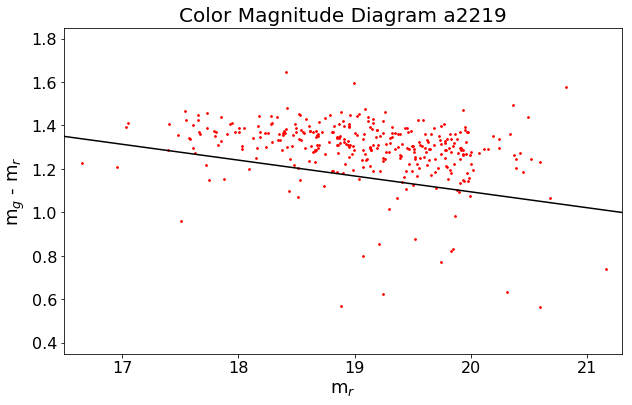

In [87]:
cz2, ecz2, g2, r2, mem2, dist2 = np.loadtxt(os.getcwd()+r"\Data\a2219newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)

memcut2 = get_indexes(1,mem2)
print(len(memcut2))
plt.scatter(r2[memcut2],g2[memcut2]-r2[memcut2],s=3,c='r')
plt.plot([16.5,21.3],[1.35,1.],c='k',linewidth=1.5)

plt.title('Color Magnitude Diagram a2219')
plt.xlabel('m$_r$')
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.85)
plt.xlim(16.5,21.3)


376


(15, 22.5)

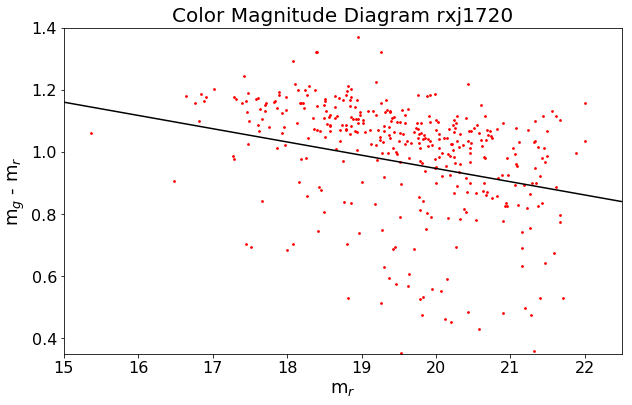

In [88]:
cz3, ecz3, g3, r3, mem3, dist3 = np.loadtxt(os.getcwd()+r"\Data\rxj1720newad.mem.dat", usecols=(2,3,5,6,10,11), unpack=True)

memcut3 = get_indexes(1,mem3)
print(len(memcut3))
plt.scatter(r3[memcut3],g3[memcut3]-r3[memcut3],s=3,c='r')
plt.plot([15,22.5],[1.16,.84],c='k',linewidth=1.5)


plt.title('Color Magnitude Diagram rxj1720')
plt.xlabel('m$_r$')
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.4)
plt.xlim(15,22.5)


(15.4, 19.2)

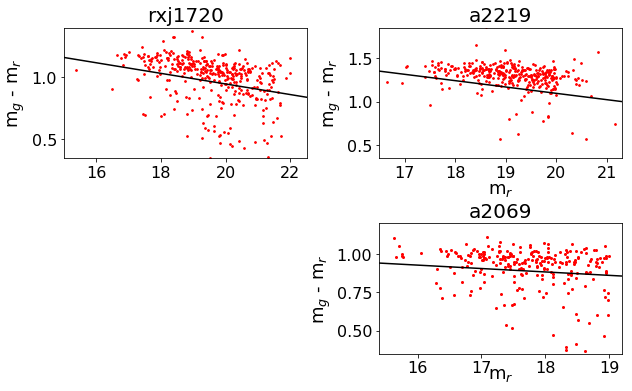

In [89]:
fig=plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3)
##############################################

plt.subplot(221)
plt.scatter(r3[memcut3],g3[memcut3]-r3[memcut3],s=3,c='r')
plt.plot([15,22.5],[1.16,.84],c='k',linewidth=1.5)


plt.title('rxj1720')
#plt.xlabel('m$_r$')
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.4)
plt.xlim(15,22.5)

#################################################################

plt.subplot(222)
plt.scatter(r2[memcut2],g2[memcut2]-r2[memcut2],s=3,c='r')
plt.plot([16.5,21.3],[1.35,1.],c='k',linewidth=1.5)

plt.title('a2219')
plt.xlabel('m$_r$',labelpad=0)
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.85)
plt.xlim(16.5,21.3)

#######################################################################

plt.subplot(224)
plt.scatter(r1[memcut1],g1[memcut1]-r1[memcut1],s=4,c='r')
plt.plot([15,19.5],[.95,.85],c='k',linewidth=1.5)

plt.title('a2069')
plt.xlabel('m$_r$',labelpad=-10)
plt.ylabel('m$_g$ - m$_r$')
plt.ylim(.35,1.2)
plt.xlim(15.4,19.2)

